In [59]:
# Import des librairies pour l'analyse de données et la visualisation

import pandas as pd      # Manipulation et analyse de données
import numpy as np       # Calculs numériques et manipulation de matrices
import matplotlib.pyplot as plt   # Visualisation de base (graphiques)
import seaborn as sns    # Visualisation statistique avancée

# Optionnel : pour des graphiques interactifs
import plotly.express as px

# 1. Chargement et exploration initial

In [60]:
# Charger le dataset
df = pd.read_csv('project_risk_raw_dataset.csv')

In [61]:
# Afficher les premières lignes
print("Premières lignes du dataset :")
print(df.head())

Premières lignes du dataset :
  Project_ID   Project_Type  Team_Size  Project_Budget_USD  \
0  PROJ_0001   Construction         32          1526276.55   
1  PROJ_0002  Manufacturing          2           390790.15   
2  PROJ_0003  Manufacturing          2           246674.76   
3  PROJ_0004             IT         12          1427830.63   
4  PROJ_0005   Construction         24          1696746.64   

   Estimated_Timeline_Months  Complexity_Score  Stakeholder_Count  \
0                         32              9.70                 16   
1                          9              2.72                  9   
2                          6              2.04                  7   
3                         17              7.54                 16   
4                         24              6.68                 17   

  Methodology_Used Team_Experience_Level  Past_Similar_Projects  ...  \
0        Waterfall                Senior                      3  ...   
1           Kanban                 Mix

In [62]:
# Afficher la structure du dataset (colonnes, types de données, valeurs manquantes)
print("\nStructure du dataset :")
print(df.info())


Structure du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Project_ID                       4000 non-null   object 
 1   Project_Type                     4000 non-null   object 
 2   Team_Size                        4000 non-null   int64  
 3   Project_Budget_USD               4000 non-null   float64
 4   Estimated_Timeline_Months        4000 non-null   int64  
 5   Complexity_Score                 4000 non-null   float64
 6   Stakeholder_Count                4000 non-null   int64  
 7   Methodology_Used                 4000 non-null   object 
 8   Team_Experience_Level            4000 non-null   object 
 9   Past_Similar_Projects            4000 non-null   int64  
 10  External_Dependencies_Count      4000 non-null   int64  
 11  Change_Request_Frequency         4000 non-null   float64
 

In [63]:
# Détecter les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())



Valeurs manquantes par colonne :
Project_ID                            0
Project_Type                          0
Team_Size                             0
Project_Budget_USD                    0
Estimated_Timeline_Months             0
Complexity_Score                      0
Stakeholder_Count                     0
Methodology_Used                      0
Team_Experience_Level                 0
Past_Similar_Projects                 0
External_Dependencies_Count           0
Change_Request_Frequency              0
Project_Phase                         0
Requirement_Stability                 0
Team_Turnover_Rate                    0
Vendor_Reliability_Score              0
Historical_Risk_Incidents             0
Communication_Frequency               0
Regulatory_Compliance_Level           0
Technology_Familiarity                0
Geographical_Distribution             0
Stakeholder_Engagement_Level          0
Schedule_Pressure                     0
Budget_Utilization_Rate               0
Execut

In [64]:
# Afficher des statistiques descriptives pour les colonnes numériques
print("\nStatistiques descriptives des colonnes numériques :")
print(df.describe())


Statistiques descriptives des colonnes numériques :
         Team_Size  Project_Budget_USD  Estimated_Timeline_Months  \
count  4000.000000        4.000000e+03                4000.000000   
mean     15.388250        1.143032e+06                  17.147750   
std       9.220969        5.908781e+05                   6.926609   
min       2.000000        1.593555e+05                   2.000000   
25%       9.000000        6.925329e+05                  12.000000   
50%      13.000000        1.007472e+06                  17.000000   
75%      20.000000        1.475870e+06                  22.000000   
max      50.000000        3.768354e+06                  36.000000   

       Complexity_Score  Stakeholder_Count  Past_Similar_Projects  \
count       4000.000000        4000.000000            4000.000000   
mean           6.192525          11.130500               1.973750   
std            2.212538           4.425875               1.750093   
min            1.620000           2.000000       

# 2. Nettoyage et préparation


In [65]:
# Nous constatons que dans l'ensemble de données, nous avons trois paramètres présentant un pourcentage élevé de valeurs manquantes et un paramètre non informatif.
# Nous pourrions le supprimer pour simplifier l'EDA.
df = df.drop(["Project_ID", "Tech_Environment_Stability", "Change_Control_Maturity", "Risk_Management_Maturity"], axis="columns")

# Vérifier qu'il n'y a plus de valeurs manquantes
print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())




Valeurs manquantes après imputation :
Project_Type                       0
Team_Size                          0
Project_Budget_USD                 0
Estimated_Timeline_Months          0
Complexity_Score                   0
Stakeholder_Count                  0
Methodology_Used                   0
Team_Experience_Level              0
Past_Similar_Projects              0
External_Dependencies_Count        0
Change_Request_Frequency           0
Project_Phase                      0
Requirement_Stability              0
Team_Turnover_Rate                 0
Vendor_Reliability_Score           0
Historical_Risk_Incidents          0
Communication_Frequency            0
Regulatory_Compliance_Level        0
Technology_Familiarity             0
Geographical_Distribution          0
Stakeholder_Engagement_Level       0
Schedule_Pressure                  0
Budget_Utilization_Rate            0
Executive_Sponsorship              0
Funding_Source                     0
Market_Volatility                  0

In [66]:
# Renommer les colonnes pour plus de clarté
df = df.rename(columns={
    "Team_Size": "TeamSize",
    "Project_Budget_USD": "ProjectBudgetUSD",
    "Estimated_Timeline_Months": "EstimatedTimelineMonths",
    "Complexity_Score": "ComplexityScore"
})

# Créer une nouvelle colonne : Budget par membre de l'équipe
df["BudgetPerTeamMember"] = df["ProjectBudgetUSD"] / df["TeamSize"]

# Afficher les premières lignes avec les modifications
print("\nPremières lignes après renommage et création de colonne :")
print(df.head())



Premières lignes après renommage et création de colonne :
    Project_Type  TeamSize  ProjectBudgetUSD  EstimatedTimelineMonths  \
0   Construction        32        1526276.55                       32   
1  Manufacturing         2         390790.15                        9   
2  Manufacturing         2         246674.76                        6   
3             IT        12        1427830.63                       17   
4   Construction        24        1696746.64                       24   

   ComplexityScore  Stakeholder_Count Methodology_Used Team_Experience_Level  \
0             9.70                 16        Waterfall                Senior   
1             2.72                  9           Kanban                 Mixed   
2             2.04                  7            Agile                 Mixed   
3             7.54                 16            Scrum                 Mixed   
4             6.68                 17           Hybrid                Junior   

   Past_Similar_Proje

# 3. Analyse descriptive et statistiqu


Statistiques descriptives globales :
          TeamSize  ProjectBudgetUSD  EstimatedTimelineMonths  \
count  4000.000000      4.000000e+03              4000.000000   
mean     15.388250      1.143032e+06                17.147750   
std       9.220969      5.908781e+05                 6.926609   
min       2.000000      1.593555e+05                 2.000000   
25%       9.000000      6.925329e+05                12.000000   
50%      13.000000      1.007472e+06                17.000000   
75%      20.000000      1.475870e+06                22.000000   
max      50.000000      3.768354e+06                36.000000   

       ComplexityScore  Stakeholder_Count  Past_Similar_Projects  \
count      4000.000000        4000.000000            4000.000000   
mean          6.192525          11.130500               1.973750   
std           2.212538           4.425875               1.750093   
min           1.620000           2.000000               0.000000   
25%           4.460000           8.0

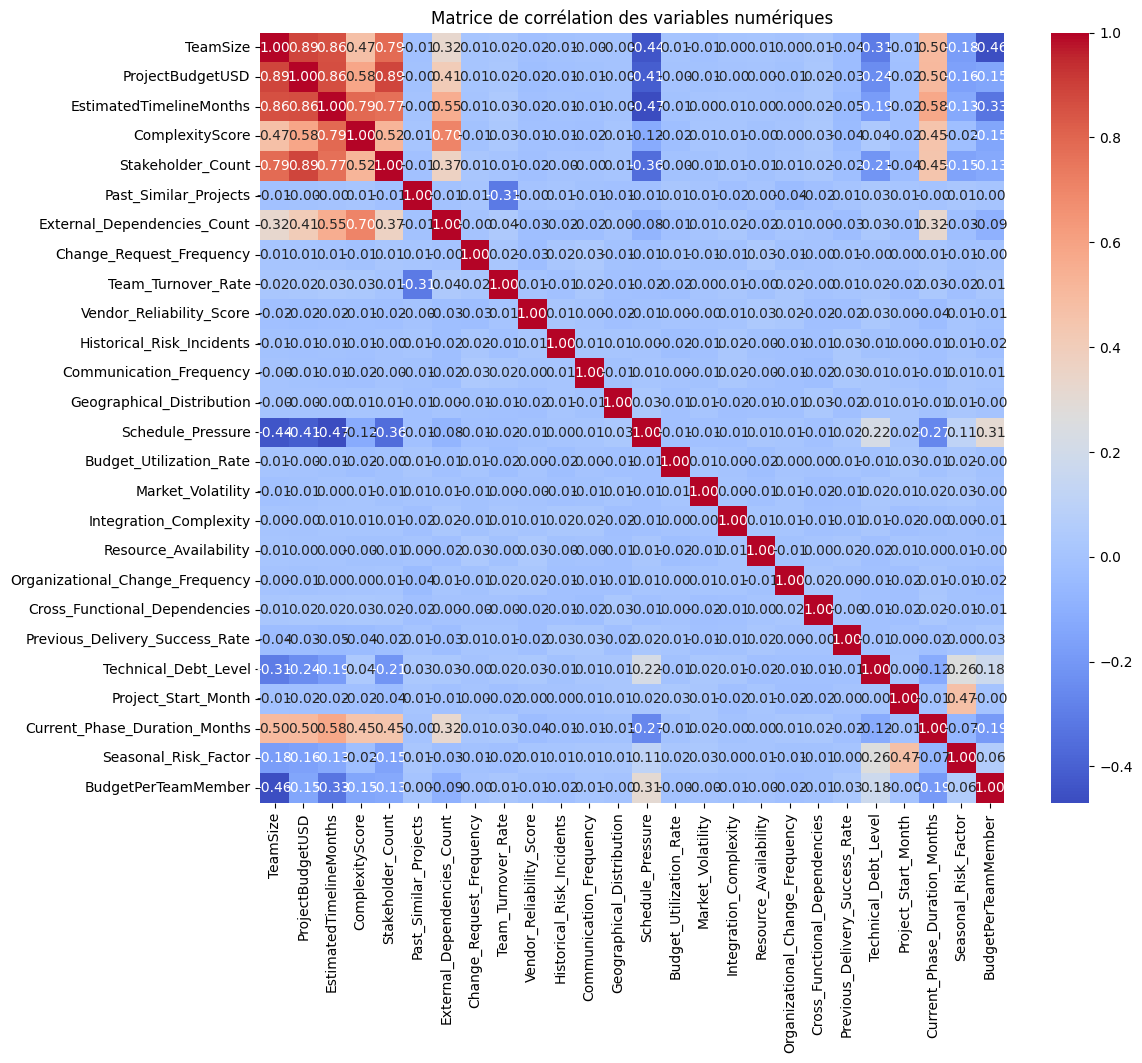

In [67]:
# Statistiques descriptives globales
print("\nStatistiques descriptives globales :")
print(df.describe())

# Regroupements par catégories (Project_Type et Methodology_Used)
print("\nMoyenne du budget par type de projet :")
print(df.groupby("Project_Type")["ProjectBudgetUSD"].mean())

print("\nMoyenne du temps estimé par méthodologie utilisée :")
print(df.groupby("Methodology_Used")["EstimatedTimelineMonths"].mean())

# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)
print("\nMatrice de corrélation :")
print(correlation_matrix)

# Visualisation de la matrice de corrélation (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

# 4. Visualisations classiques

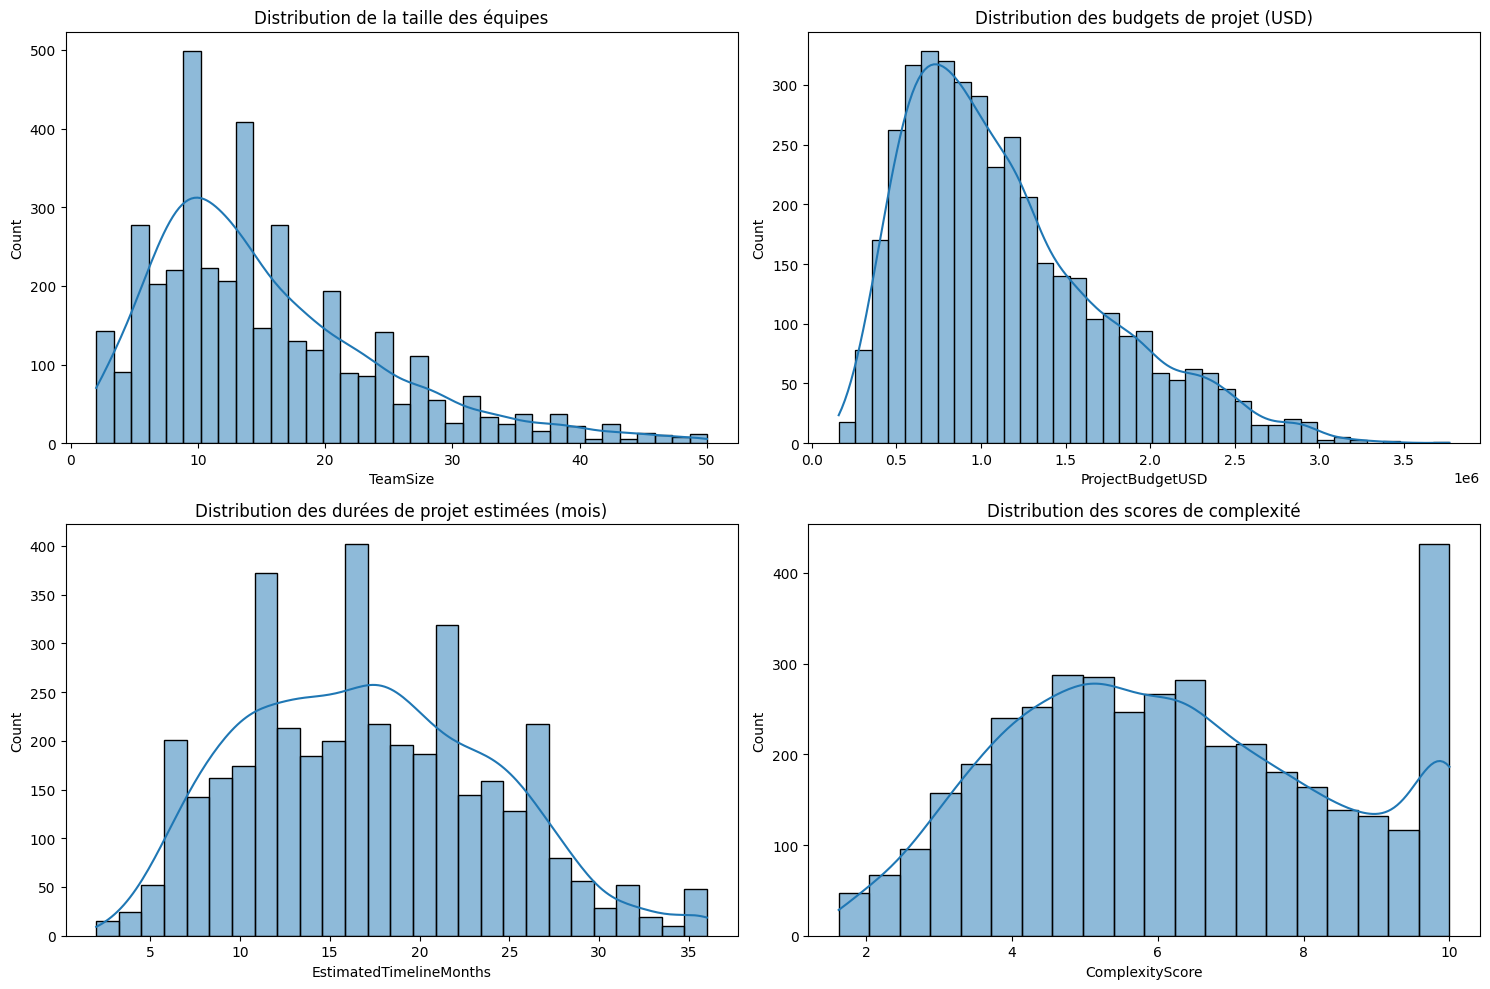

In [68]:
# Histogrammes pour les variables numériques importantes
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df["TeamSize"], kde=True)
plt.title("Distribution de la taille des équipes")

plt.subplot(2, 2, 2)
sns.histplot(df["ProjectBudgetUSD"], kde=True)
plt.title("Distribution des budgets de projet (USD)")

plt.subplot(2, 2, 3)
sns.histplot(df["EstimatedTimelineMonths"], kde=True)
plt.title("Distribution des durées de projet estimées (mois)")

plt.subplot(2, 2, 4)
sns.histplot(df["ComplexityScore"], kde=True)
plt.title("Distribution des scores de complexité")

plt.tight_layout()
plt.show()

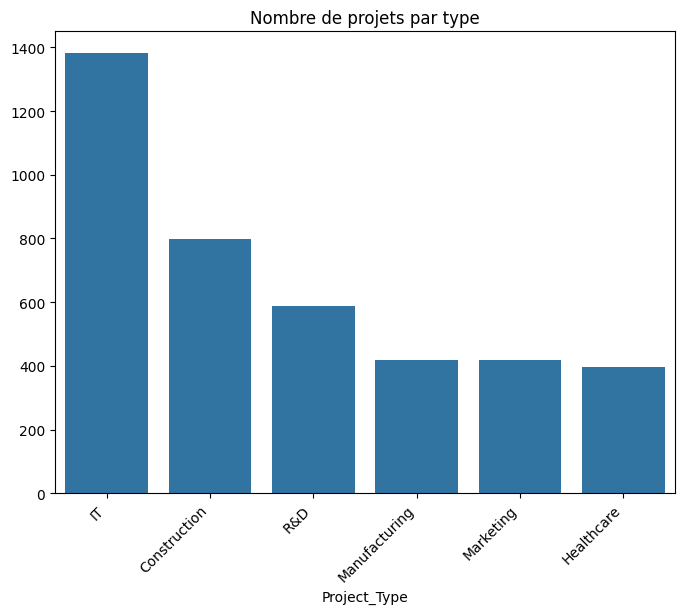

In [69]:
# Barres verticales pour le type de projet
plt.figure(figsize=(8, 6))
project_type_counts = df["Project_Type"].value_counts()
sns.barplot(x=project_type_counts.index, y=project_type_counts.values)
plt.title("Nombre de projets par type")
plt.xticks(rotation=45, ha="right")
plt.show()

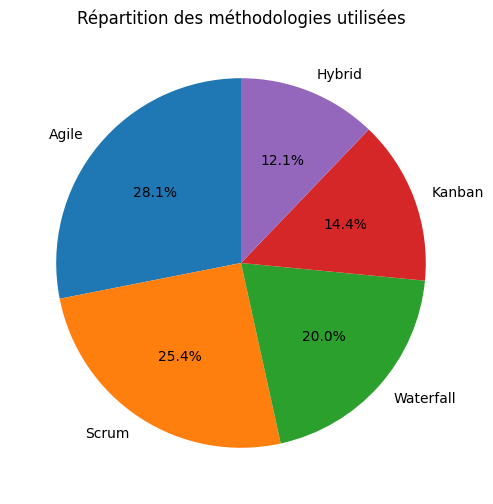

In [70]:
# Diagramme circulaire pour la méthodologie utilisée
plt.figure(figsize=(8, 6))
methodology_counts = df["Methodology_Used"].value_counts()
plt.pie(methodology_counts, labels=methodology_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Répartition des méthodologies utilisées")
plt.show()

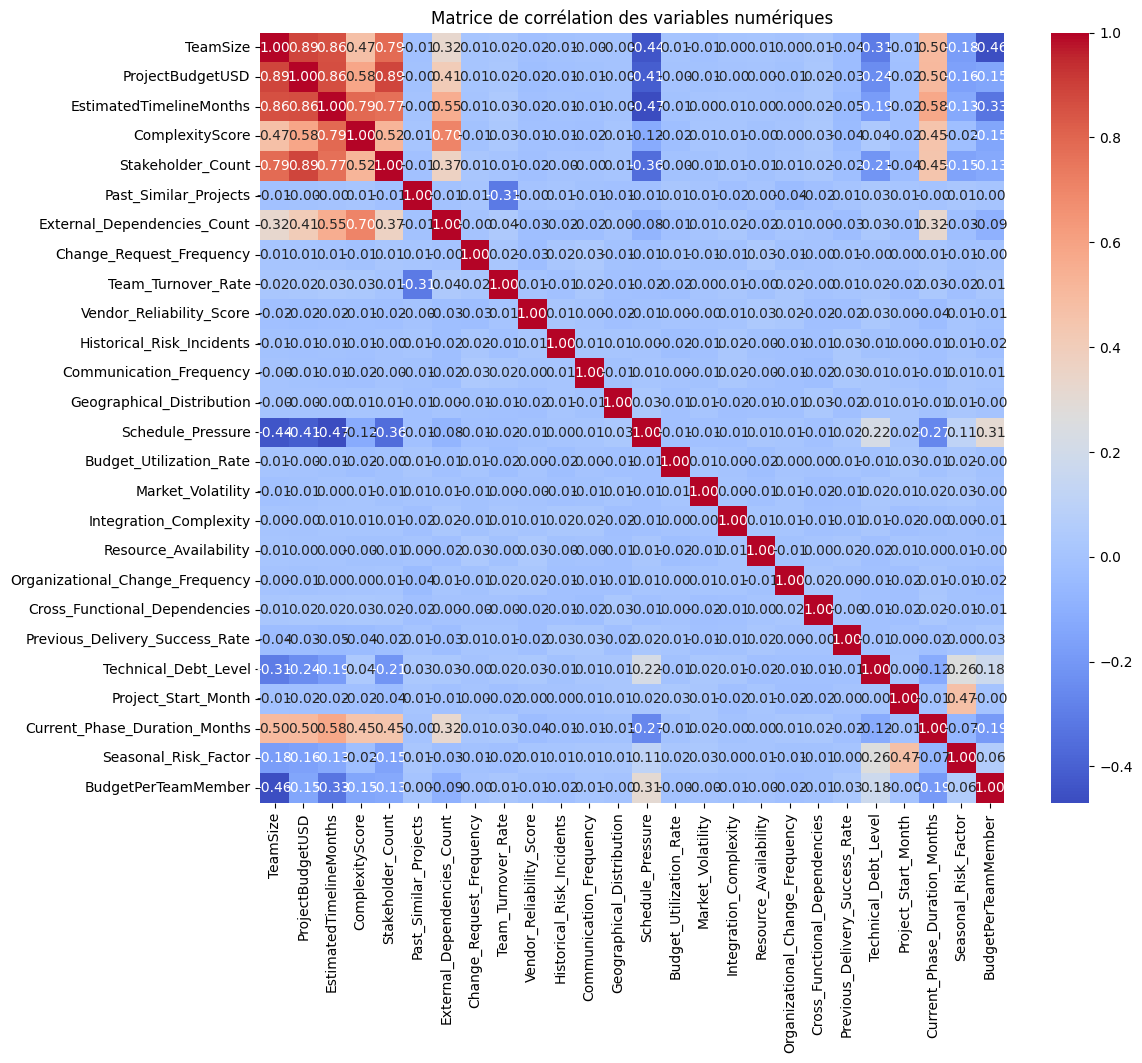

In [71]:
# Heatmap de corrélation (déjà calculée précédemment, on réaffiche juste le graphique)
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

# 5. Visualisations avancées


In [72]:
# Scatter plot interactif : Budget vs. Temps, coloré par type de projet
fig = px.scatter(df, x="EstimatedTimelineMonths", y="ProjectBudgetUSD",
                 color="Project_Type", hover_data=["TeamSize", "ComplexityScore"],
                 title="Budget du projet vs. Temps estimé par type de projet")
fig.show()


In [73]:
# Diagramme à barres interactif : Nombre de projets par méthodologie, coloré par niveau d'expérience de l'équipe
fig = px.bar(df, x="Methodology_Used", color="Team_Experience_Level",
            title="Nombre de projets par méthodologie, coloré par niveau d'expérience de l'équipe")
fig.show()

# 6. Définition de KPI pertinents


KPI 1: Taux de projets réussis par type de projet

Pour définir ce KPI, nous allons supposer qu'un projet est considéré comme réussi si son score de complexité est inférieur à la moyenne et que son budget est inférieur à la moyenne pour son type de projet.

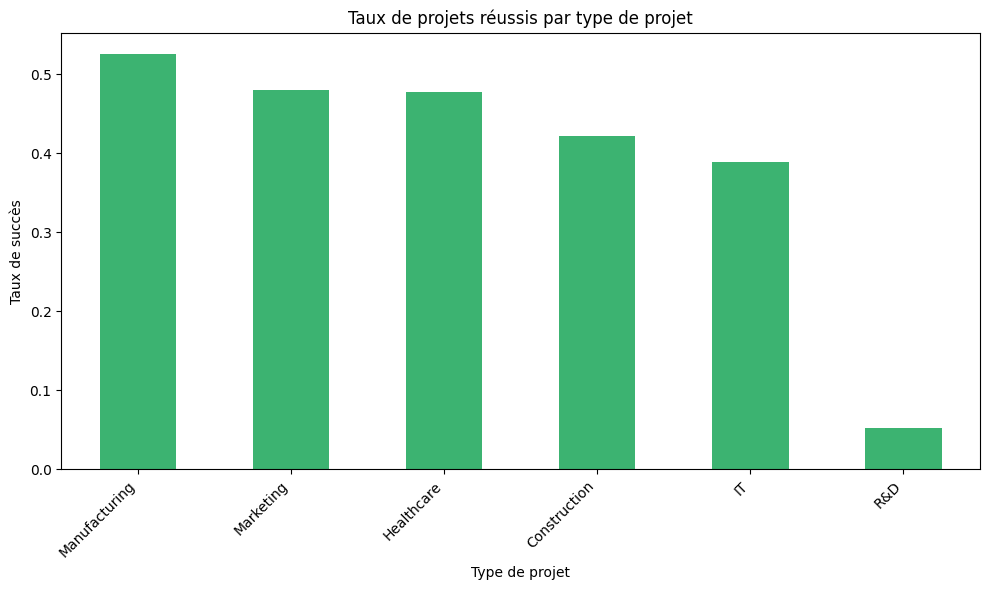


Taux de projets réussis par type de projet:
Project_Type
Manufacturing    0.526316
Marketing        0.480861
Healthcare       0.477387
Construction     0.421581
IT               0.388849
R&D              0.052721
Name: Successful, dtype: float64


In [74]:
# Calcul du score de complexité moyen
mean_complexity = df['ComplexityScore'].mean()

# Calcul du budget moyen par type de projet
mean_budget_by_type = df.groupby('Project_Type')['ProjectBudgetUSD'].mean()

# Définition d'une fonction pour déterminer si un projet est réussi
def is_successful(row):
    if row['ComplexityScore'] < mean_complexity and row['ProjectBudgetUSD'] < mean_budget_by_type[row['Project_Type']]:
        return True
    else:
        return False

# Application de la fonction pour créer une colonne 'Successful'
df['Successful'] = df.apply(is_successful, axis=1)

# Calcul du taux de projets réussis par type de projet
success_rate_by_type = df.groupby('Project_Type')['Successful'].mean().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
success_rate_by_type.plot(kind='bar', color='mediumseagreen')
plt.title('Taux de projets réussis par type de projet')
plt.xlabel('Type de projet')
plt.ylabel('Taux de succès')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTaux de projets réussis par type de projet:")
print(success_rate_by_type)

KPI 2 : Durée moyenne des projets par méthodologie utilisée

Cet indicateur nous montrera quelles méthodologies ont tendance à entraîner des durées de projet plus longues ou plus courtes.

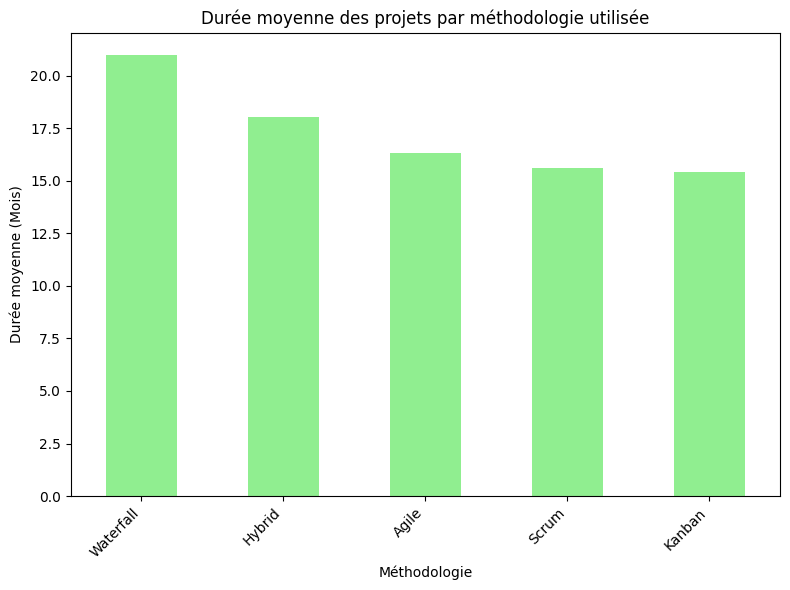


Durée moyenne des projets par méthodologie utilisée :
Methodology_Used
Waterfall    20.992509
Hybrid       18.024691
Agile        16.315836
Scrum        15.588757
Kanban       15.426087
Name: EstimatedTimelineMonths, dtype: float64


In [75]:
# Calcul de la durée moyenne des projets par méthodologie
avg_timeline_by_method = df.groupby('Methodology_Used')['EstimatedTimelineMonths'].mean().sort_values(ascending=False)

# Représentation visuelle
plt.figure(figsize=(8, 6))
avg_timeline_by_method.plot(kind='bar', color='lightgreen')
plt.title('Durée moyenne des projets par méthodologie utilisée')
plt.xlabel('Méthodologie')
plt.ylabel('Durée moyenne (Mois)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nDurée moyenne des projets par méthodologie utilisée :")
print(avg_timeline_by_method)

KPI 3 : Score de complexité moyen par niveau d'expérience de l'équipe

Cet indicateur fournira des informations sur la question de savoir si les équipes plus expérimentées ont tendance à gérer des projets plus complexes.

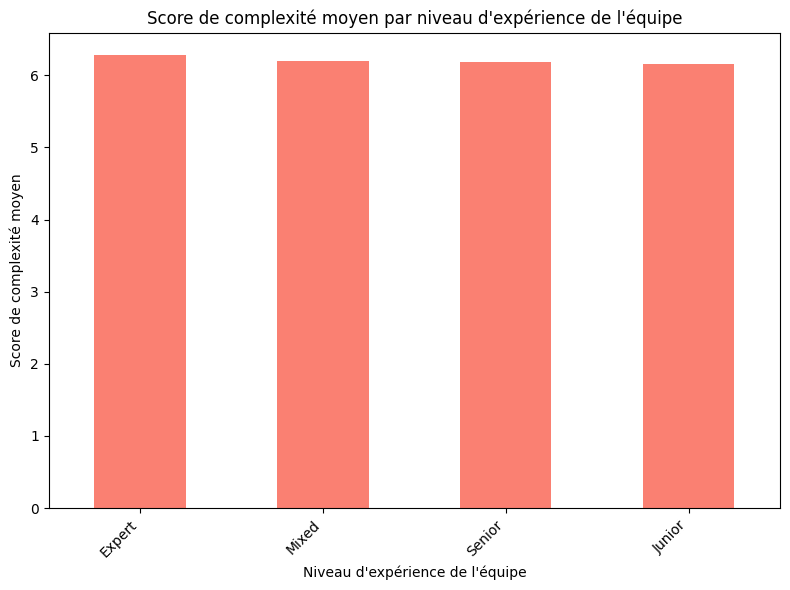


Score de complexité moyen par niveau d'expérience de l'équipe :
Team_Experience_Level
Expert    6.273928
Mixed     6.193836
Senior    6.180455
Junior    6.160239
Name: ComplexityScore, dtype: float64


In [76]:
# Calcul du score de complexité moyen par niveau d'expérience de l'équipe
avg_complexity_by_experience = df.groupby('Team_Experience_Level')['ComplexityScore'].mean().sort_values(ascending=False)

# Représentation visuelle
plt.figure(figsize=(8, 6))
avg_complexity_by_experience.plot(kind='bar', color='salmon')
plt.title('Score de complexité moyen par niveau d\'expérience de l\'équipe')
plt.xlabel('Niveau d\'expérience de l\'équipe')
plt.ylabel('Score de complexité moyen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nScore de complexité moyen par niveau d'expérience de l'équipe :")
print(avg_complexity_by_experience)